<a href="https://colab.research.google.com/github/micherjo/DrugReviewsDataMining/blob/main/INLS_690_Project_Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Drugs.com Reviews Exploratory Analysis

**Importing Libraries**

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for providing the path
import os


**Reading the data**

In [ ]:
data = pd.read_csv('drugsComTrain_raw.tsv', delimiter = '\t', quoting = 1, engine='python', encoding='utf-8', error_bad_lines=False)
# getting the shape of the data
data.shape

(161297, 7)

In [ ]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
# describing the data set

data.describe().round(2)

,Unnamed: 0,rating,usefulCount
count,161297.00,161297.00,161297.0
mean,115923.59,6.99,28.0
std,67004.45,3.27,36.4
min,2.00,1.00,0.0
25%,58063.00,5.00,6.0
50%,115744.00,8.00,16.0
75%,173776.00,10.00,36.0
max,232291.00,10.00,1291.0


**Describing the data according to the Length of the reviews**

In [ ]:
# adding a length column for analyzing the length of the reviews

data['length'] = data['review'].apply(len)

data.groupby('length').describe().sample(10)

Unnamed: 0                               ... usefulCount              
            count           mean           std  ...         50%    75%    max
length                                          ...                          
74          118.0  118251.322034  68367.616623  ...        18.0  33.75  101.0
433         192.0  101568.000000  64245.684791  ...        16.5  30.00  173.0
1429          3.0  132700.666667   9871.954838  ...         3.0   7.50   12.0
201         174.0  113996.580460  69578.683763  ...        17.0  40.00  145.0
91          167.0  120746.910180  67233.566407  ...        20.0  44.00  168.0
686         196.0  109517.551020  66239.900858  ...        16.0  43.25  167.0
607         159.0  119071.930818  69018.533174  ...        11.0  35.00  205.0
134         160.0  115023.462500  65731.203943  ...        19.5  33.00  161.0
190         219.0  111199.593607  67106.203681  ...        19.0  34.00  163.0
60          127.0  119196.330709  68048.829829  ...        17.0  39.00  205.0

[10 rows x 24 columns]

**Describing the data according to the ratings**

In [ ]:
data.groupby('rating').describe().round(2)

Unnamed: 0                              ... length                       
            count       mean       std    min  ...    25%    50%    75%      max
rating                                         ...                              
1.0       21619.0  114357.59  68250.67    5.0  ...  226.0  404.0  652.0   3692.0
2.0        6931.0  114035.42  66887.11    9.0  ...  256.0  448.0  673.0  10787.0
3.0        6513.0  113862.80  66284.81   12.0  ...  277.0  454.0  682.0   5112.0
4.0        5012.0  115538.76  66005.96   29.0  ...  282.0  457.0  685.0   3030.0
5.0        8013.0  115148.17  66742.02    7.0  ...  292.0  480.0  704.0   2048.0
6.0        6343.0  115143.67  67002.37  113.0  ...  283.0  468.0  688.0   2202.0
7.0        9456.0  115635.99  66954.97   10.0  ...  294.0  498.0  711.0   3063.0
8.0       18890.0  116656.21  67090.59    3.0  ...  292.0  495.0  713.0   4087.0
9.0       27531.0  116259.18  66657.53    4.0  ...  283.0  483.0  710.0   6182.0
10.0      50989.0  116964.87  66860.19    2.0  ...  243.0  434.0  676.0   6192.0

[10 rows x 24 columns]

**Describing the data according to the drug Name**

In [ ]:
data.groupby('drugName').describe().sample(10).round(2)

Unnamed: 0                     ... length                
                      count       mean     std  ...    50%     75%     max
drugName                                        ...                       
Uta                     3.0  199496.67    1.53  ...   82.0  108.00   134.0
Insulin isophane        3.0  196150.67    2.52  ...  257.0  317.50   378.0
Taxotere                5.0  230698.20    2.59  ...  249.0  475.00   790.0
Bupropion            1022.0  225342.77  429.56  ...  543.0  733.75  1467.0
Alcaftadine            13.0  200960.00    4.98  ...  336.0  505.00   753.0
Relpax                 95.0  136147.37   66.49  ...  435.0  612.50   779.0
Codeine                28.0    4205.79   13.66  ...  218.5  323.75   773.0
Cyclafem 1 / 35         7.0   97763.86    3.13  ...  334.0  437.50   595.0
Velcade                 2.0   91298.50    0.71  ...  306.0  326.00   346.0
Maxalt                 70.0   52910.21   28.34  ...  404.0  612.50   775.0

[10 rows x 32 columns]

Describing data according to how many people found the review useful

In [ ]:
data.groupby('usefulCount').describe().sample(10).round(2)

Unnamed: 0                               ... length               
                 count           mean           std  ...    50%    75%     max
usefulCount                                          ...                      
126               83.0  120168.903614  68268.001485  ...  530.0  716.5   789.0
17              2941.0  118228.766066  65808.635862  ...  451.0  684.0  1191.0
162               24.0  124722.458333  53567.747759  ...  601.5  695.5   804.0
585                1.0  204649.000000           NaN  ...  463.0  463.0   463.0
559                1.0   89689.000000           NaN  ...  724.0  724.0   724.0
0               6318.0  116289.954574  68302.978022  ...  471.0  695.0  2471.0
448                3.0  155927.000000  75543.913560  ...  314.0  528.5   743.0
22              2307.0  118244.731686  67775.163021  ...  434.0  675.0  1381.0
99               151.0  118455.715232  64684.827703  ...  461.0  620.0  2921.0
371                2.0  182577.000000  31033.502413  ...  743.0  743.0   743.0

[10 rows x 24 columns]

**Describe data according to condition treated**




In [ ]:
data.groupby('condition').describe().sample(10).round(2)

Unnamed: 0             ...  length        
                                            count       mean  ...     75%     max
condition                                                     ...                
Body Dysmorphic Disorde                       9.0  143174.56  ...  619.00   768.0
Acute Coronary Syndrome                      54.0  152524.63  ...  495.75   780.0
Cutaneous Candidiasis                        12.0   91468.50  ...  531.25   779.0
Juvenile Idiopathic Arthritis                17.0  113024.18  ...  671.00   769.0
Anxiety                                    5904.0  133130.50  ...  703.00  2825.0
Uterine Fibroids                             49.0  120103.61  ...  742.00   769.0
Trichotillomania                             14.0  110965.29  ...  755.00   823.0
Deep Vein Thrombosis, Prophylaxis            14.0   99906.36  ...  722.75   797.0
Skin or Soft Tissue Infection               225.0  121020.45  ...  615.00   803.0
Pathological Hypersecretory Conditions        2.0   80030.50  ...  698.00   698.0

[10 rows x 32 columns]

## Data Visualizations

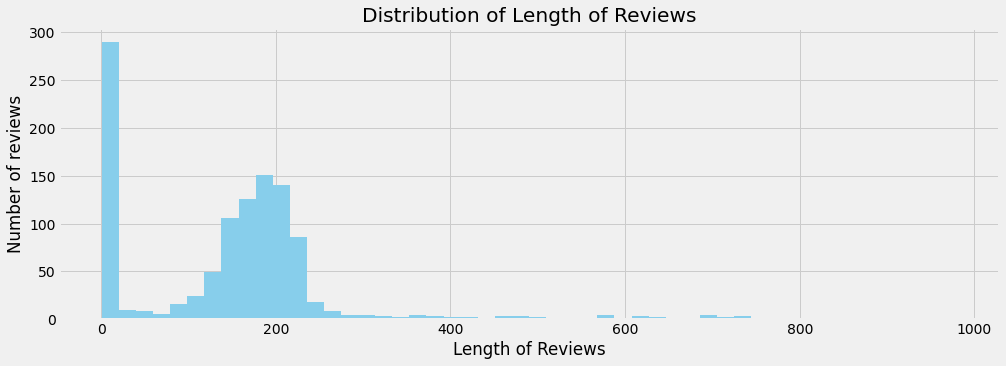

In [ ]:

data['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length of Reviews')
plt.xlabel('Length of Reviews')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
data[data['length'] == 21]['review'].iloc[0]

'"Terrible akathisia."'

In [ ]:
data[data['length'] == 50]['review'].iloc[0]

'"It has always helped me with my lower back pain."'

In [ ]:
data[data['length'] == 150]['review'].iloc[0]

'"Have been taking Viberzi for a month now for IBS-D and I can&#039;t be happier. I have ZERO side effects. Thank you for making me normal again!!!!!!"'

###Feature Extraction by Reviews


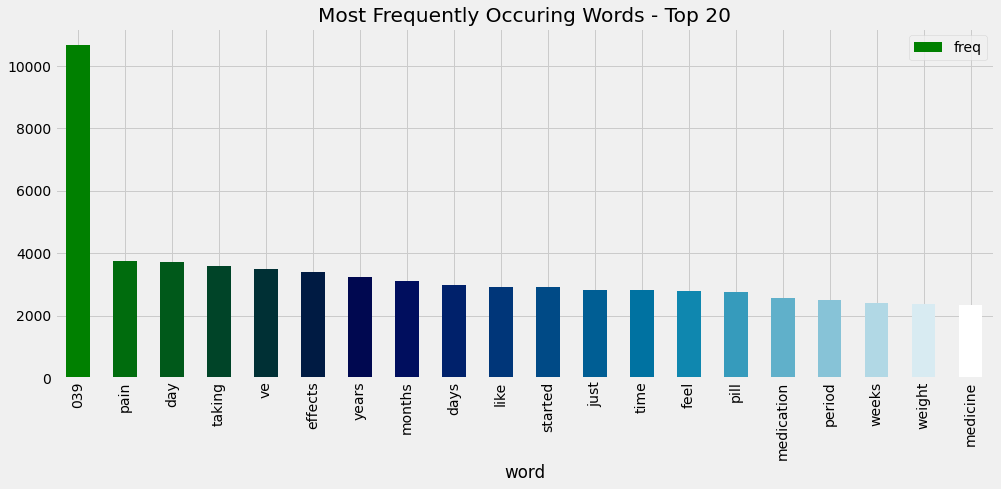

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english')
words = cv.fit_transform(data.review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

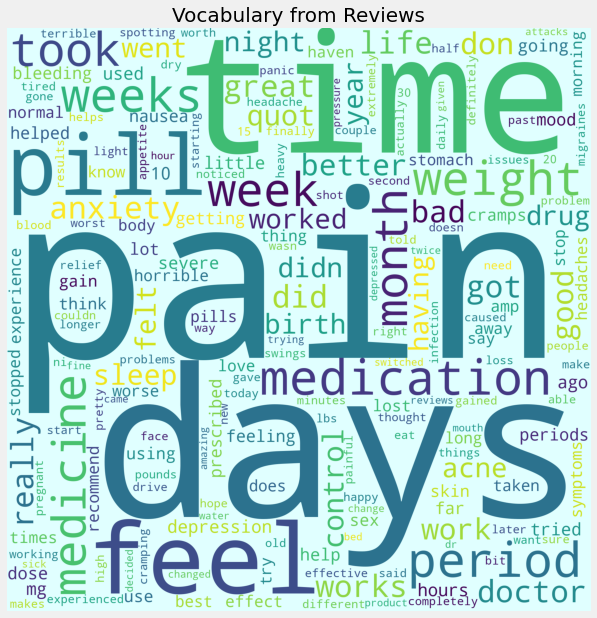

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

## Clean the text

In [ ]:
# cleaning the text
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer


#vectorizer = TfidfVectorizer(stop_words = None).fit(train_corpus)

cv = CountVectorizer(stop_words = None).fit(data)
print(cv.vocabulary_)


{'unnamed': 6, 'drugname': 2, 'condition': 0, 'review': 5, 'rating': 4, 'date': 1, 'usefulcount': 7, 'length': 3}


In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

ValueError: ignored